In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pycountry
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

spotify = pd.read_csv('spotify_US.csv')

In [46]:
# (spotify.nunique(), len(spotify))
spotify['snapshot_date'].unique()

array(['2023-11-30', '2023-11-29', '2023-11-28', '2023-11-27',
       '2023-11-26', '2023-11-25', '2023-11-24', '2023-11-23',
       '2023-11-22', '2023-11-21', '2023-11-20', '2023-11-18',
       '2023-11-17', '2023-11-16', '2023-11-15', '2023-11-14',
       '2023-11-13', '2023-11-12', '2023-11-11', '2023-11-10',
       '2023-11-09', '2023-11-08', '2023-11-07', '2023-11-06',
       '2023-11-05', '2023-11-04', '2023-11-03', '2023-11-02',
       '2023-11-01', '2023-10-31', '2023-10-30', '2023-10-29',
       '2023-10-28', '2023-10-27', '2023-10-26', '2023-10-25',
       '2023-10-24', '2023-10-23', '2023-10-22', '2023-10-21',
       '2023-10-20', '2023-10-19', '2023-10-18'], dtype=object)

In [32]:
train_df, test_df = train_test_split(spotify, test_size = 0.3, random_state = 42)

# train dataset x, y values
x_train = train_df[['loudness', 'valence', 'acousticness', 'danceability']] # defining X values
# del x_train['spotify_id'] # deleting temp column
# del x_train['name'] # deleting temp column
# del x_train['artists'] # deleting year column
# del x_train['snapshot_date'] # deleting month column
# del x_train['popularity'] # deleting month column
# del x_train['is_explicit'] # deleting month column
# del x_train['album_name'] # deleting month column
# del x_train['album_release_date'] # deleting month column
# del x_train['country'] # deleting temp column
# del x_train['daily_rank'] # deleting temp column
# del x_train['daily_movement'] # deleting temp column
# del x_train['weekly_movement'] # deleting temp column
# del x_train['mode'] # deleting temp column
# del x_train['time_signature'] # deleting temp column

y_train = train_df['popularity']

# test dataset x, y values
x_test = test_df[['loudness', 'valence', 'acousticness', 'danceability']] # defining X values
# del x_test['spotify_id'] # deleting temp column
# del x_test['name'] # deleting temp column
# del x_test['artists'] # deleting year column
# del x_test['snapshot_date'] # deleting month column
# del x_test['popularity'] # deleting month column
# del x_test['is_explicit'] # deleting month column
# del x_test['album_name'] # deleting month column
# del x_test['album_release_date'] # deleting month column
# del x_test['country'] # deleting temp column
# del x_test['daily_rank'] # deleting temp column
# del x_test['daily_movement'] # deleting temp column
# del x_test['weekly_movement'] # deleting temp column
# del x_test['mode'] # deleting temp column
# del x_test['time_signature'] # deleting temp column

y_test = test_df['popularity']

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((1505, 4), (1505,)), ((646, 4), (646,)))

In [8]:
decision_tree = DecisionTreeRegressor(random_state = 42, max_depth = 10)

decision_tree.fit(x_train, y_train)

# plt.figure(figsize = (20, 8))

# plot_tree(decision_tree, feature_names = x_train.columns.to_list(), filled = True)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [34]:
regression_model = LinearRegression()

regression_model_fit = regression_model.fit(x_train, y_train)

round(regression_model.score(x_train, y_train), 2)

0.03

In [9]:
x_train.columns

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

In [33]:
random_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)

random_forest_fit = random_forest.fit(x_train, y_train)

importances = random_forest.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'feature': x_train.columns, 'importance': importances})

# Sort the DataFrame to find the most important features
feature_importances.sort_values(by = 'importance', ascending = False, inplace = True)

print(feature_importances)

        feature  importance
0      loudness    0.256512
2  acousticness    0.253101
3  danceability    0.247959
1       valence    0.242428


In [36]:
predictions = random_forest.predict(x_test)

# Calculate the Mean Squared Error and the R-squared value
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 107.39905489985775
R-squared: 0.14839987762412554


/var/folders/75/p026c7vj06qb1cwvpcnx3n1c0000gn/T/ipykernel_19461/33664043.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_median_popularity = spotify.groupby('snapshot_date').median()['popularity']


ConversionError: Failed to convert value(s) to axis units: Index(['2023-10-18', '2023-10-19', '2023-10-20', '2023-10-21', '2023-10-22',
       '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
       '2023-10-28', '2023-10-29', '2023-10-30', '2023-10-31', '2023-11-01',
       '2023-11-02', '2023-11-03', '2023-11-04', '2023-11-05', '2023-11-06',
       '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-11',
       '2023-11-12', '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16',
       '2023-11-17', '2023-11-18', '2023-11-20', '2023-11-21', '2023-11-22',
       '2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26', '2023-11-27',
       '2023-11-28', '2023-11-29', '2023-11-30'],
      dtype='object', name='snapshot_date')

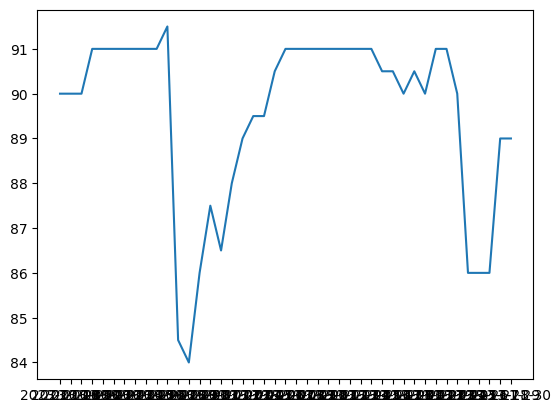

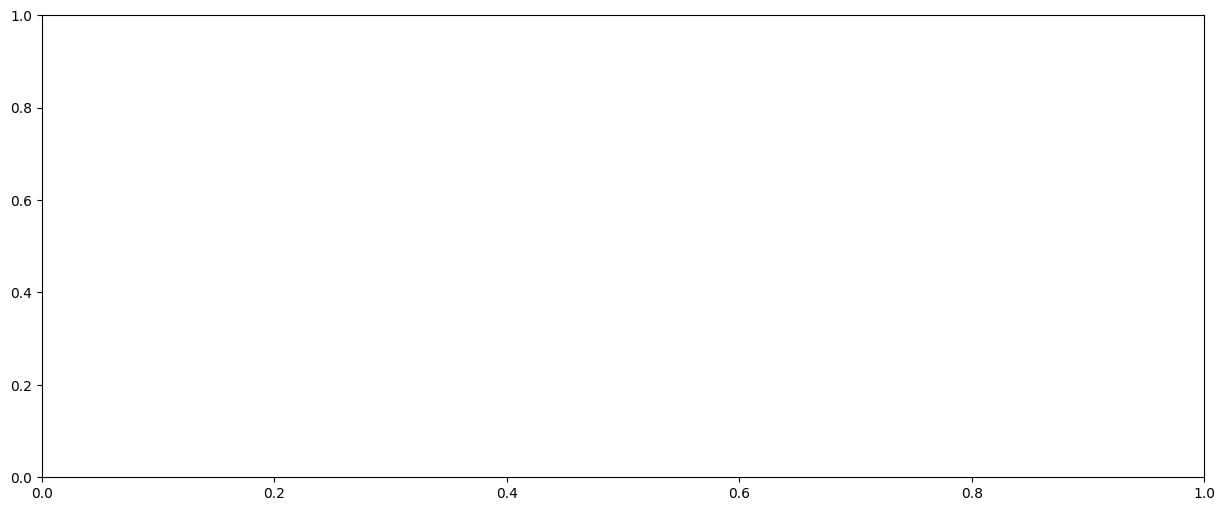

In [72]:
# Example for calculating the median popularity each day
spotify.set_index('snapshot_date', inplace=False)

daily_median_popularity = spotify.groupby('snapshot_date').median()['popularity']
plt.plot(daily_median_popularity.index, daily_median_popularity.values)
plt.figure(figsize = (15, 6))  # Adjust the figure size as needed
plt.xticks(daily_median_popularity.index, daily_median_popularity.index, rotation=90)
plt.title('Daily Median Popularity of Songs on Spotify')
plt.xlabel('Date')
plt.ylabel('Median Popularity')
plt.grid(True)
plt.show()

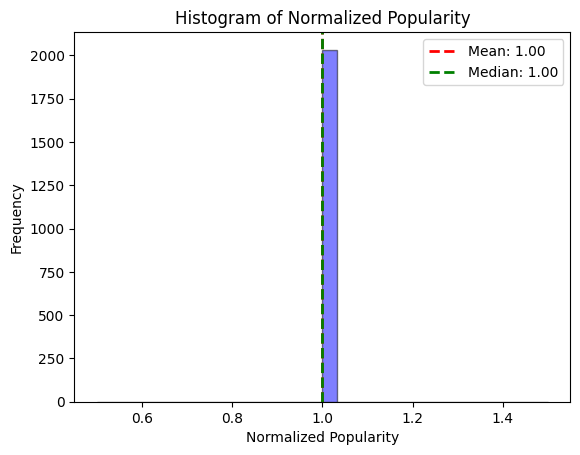

In [18]:
# Assuming `df` is your DataFrame and `column` is the name of the column with the data.
Q1 = spotify['popularity'].quantile(0.25)
Q3 = spotify['popularity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = spotify[(spotify['popularity'] >= lower_bound) & (spotify['popularity'] <= upper_bound)]
filtered_df = filtered_df['popularity']
filtered_df

normalized_arr = preprocessing.normalize(filtered_df.values.reshape(-1, 1))
normalized_flat = normalized_arr.flatten()

mean_val = np.mean(normalized_flat)
median_val = np.median(normalized_flat)

plt.hist(normalized_flat, bins=30, alpha=0.5, color='blue', edgecolor='black')

# Plot the mean and median
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Add legend
plt.legend()

# Add title and labels
plt.title('Histogram of Normalized Popularity')
plt.xlabel('Normalized Popularity')
plt.ylabel('Frequency')

# Show the plot
plt.show()

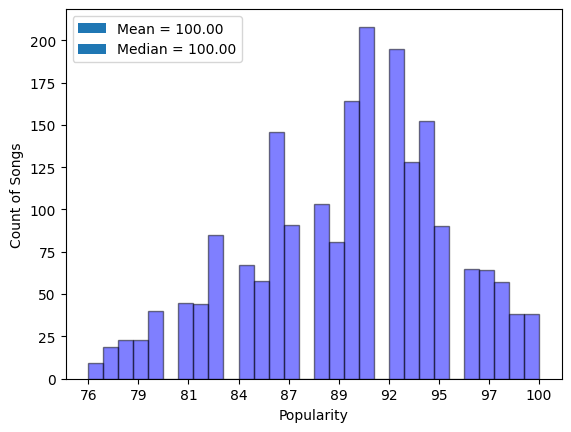

In [80]:
from matplotlib import patches
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(filtered_df[['popularity']])  # Make sure it's a 2D array

scaled_flat = scaled_data.flatten()

ticks_scaled = np.linspace(start=min(scaled_flat), stop=max(scaled_flat), num=10)
ticks_original = scaler.inverse_transform(ticks_scaled.reshape(-1, 1)).flatten()

# Calculate mean and median of the scaled data
mean_val = np.mean(scaled_flat)
median_val = np.median(scaled_flat)

# Create the histogram for scaled data
plt.hist(scaled_flat, bins=30, alpha=0.5, color='blue', edgecolor='black')

# plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_original:.2f}')
# plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_original:.2f}')

mean_patch = patches.Patch(label=f'Mean = 100.00')
median_patch = patches.Patch(label=f'Median = 100.00')

# Add only the patch to the legend, handles = [mean_patch, median_patch]
plt.legend(handles = [mean_patch, median_patch])

# Add legend, title, and labels
plt.xlabel('Popularity')
plt.ylabel('Count of Songs')
plt.xticks(ticks_scaled, [f'{tick:.0f}' for tick in ticks_original])
# Show the plot
plt.show()